In [1]:
import os

os.chdir(r"D:\NanoDiamond\PulseSequencer")

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from LogicManagers import pulseAnalayzer

In [2]:
x = [10033, 9952, 9997, 10038, 10109, 10657, 10715, 10589, 10461, 10797, 10753, 11083, 10726, 10698, 10824, 10647, 10467, 10437, 10318, 10242, 10457, 1554803, 3710108, 3929560, 3985154, 4045616, 3982821, 3961338, 3950190, 3930728, 3929782, 3925727, 3924771, 3932164, 3929028, 3928095, 3924882, 3928606, 3913723, 3905840, 3903655, 3904027, 3902078, 3902431, 3896397, 3898420, 3891402, 3891981, 3893101, 3892167, 3886537, 3893111, 3888403, 3887640, 3889930, 3890985, 3888464, 3887099, 3880367, 3881585, 3879131, 3880895, 3882183, 3879243, 3878879, 3882014, 3885031, 3887185, 3885721, 3883370, 3884422, 3883431, 3883746, 3885637, 3884210, 3883443, 3884286, 3886959, 3886951, 3885636, 3885149, 3883374, 3880865, 3882164, 3883853, 3880523, 3878548, 3877758, 3873523, 3879646, 3870529, 3869974, 3869089, 3870231, 3867073, 3865429, 3862331, 3861798, 3865331, 3864708, 3861873, 3859348, 3857026, 3855067, 3853766, 3850939, 3851789, 3851978, 3850902, 3848657, 3845384, 3844071, 3842181, 3843529, 3843104, 3842741, 3841138, 3837483, 3840745, 3842494, 3843067, 3836008, 3835962, 3837192, 3834742, 3832678, 3830485, 3823799, 3822255, 3825030, 3823663, 3817165, 3819207, 3809579, 3812052, 3812313, 3809460, 3816226, 3812643, 3810820, 3809115, 3807392, 3802222, 3805428, 3802960, 3804554, 3805060, 3803047, 3805561, 3806907, 3807714, 3806132, 3798091, 3801346, 3793201, 3792508, 3793506, 3790667, 3797552, 3799104, 3792659, 3795361, 3784318, 3776634, 3781752, 3779613, 3783288, 3780332, 3781414, 3779537, 3779941, 3769312, 3770692, 3772547, 3771277, 3778315, 3777881, 3780396, 3784919, 3785612, 3786621, 3788885, 3785686, 3786376, 3778339, 3781417, 3781930, 3827250, 1729427, 350413, 99535, 60503, 43975, 38740, 33928, 29971, 27797, 26354, 25285, 23508, 22276, 20801, 20038, 18251, 18945, 20318, 19047, 18667, 17973, 17291, 17720, 17316, 17058, 16920, 17155, 17464, 17574, 16771, 16459, 16265, 16333, 15702, 15362, 15556, 15249, 15801, 15986, 16370, 16185, 16281, 15863, 15314, 15334, 15064, 15154, 14971, 15068, 15297, 15060, 14836, 14533, 14301, 13877, 13831, 14181, 14026, 14069, 14220, 14280, 14198, 14060, 13969, 13759, 13160, 13186, 13035, 13067, 13104, 13526, 13508, 13395, 13582, 13643, 14012, 14507, 14361, 14352, 13959, 14280, 14007, 13967, 13963, 13897, 14005, 13903, 13921, 13843, 13455, 13710, 13983, 14047, 13698, 13574, 13585, 14201, 14448, 14798, 14466, 14133, 14315, 14106, 14207, 14473, 14590, 14347, 14142, 14207, 14888, 16010, 16665, 16165, 15681, 15596, 15691, 15103, 15290, 15312, 15325, 15297, 15750, 15218, 15104, 14291, 14322, 13982, 14494, 13684, 13171, 13155, 13900, 13637, 13776, 13891, 13517, 13343, 13197, 12770, 12689, 12111, 12907, 13385, 13262, 13165, 13273, 12748, 12130, 11854, 12091, 12159, 12035, 12027, 11933, 11827, 11806, 11689, 11295, 11228, 10999, 10887, 10652, 10602, 10283, 10094, 9958, 445023, 3312918, 3837047, 3824877, 3916769, 3906860, 3865284, 3851893, 3832444, 3831678, 3834580, 3829051, 3842005, 3839463, 3842542, 3840815, 3835272, 3826794, 3812411, 3813056, 3812548, 3806125, 3803085, 3806017, 3804413, 3804379, 3808593, 3808490, 3802805, 3805027, 3804968, 3805785, 3800372, 3800843, 3804134, 3801528, 3806440, 3801591, 3794131, 3794576, 3794125, 3795818, 3791838, 3787029, 3787738, 3789354, 3787251, 3789171, 3793975, 3793616, 3794585, 3790627, 3789624, 3793921, 3791859, 3796196, 3804065, 3797572, 3797299, 3795472, 3796708, 3799828, 3799328, 3801137, 3801992, 3799345, 3796828, 3794610, 3792622, 3801007, 3797653, 3790239, 3794377, 3794333, 3787444, 3787602, 3783067, 3780531, 3780789, 3780193, 3781163, 3775045, 3773190, 3772010, 3773719, 3775292, 3766915, 3761547, 3762797, 3761804, 3760756, 3757273, 3750900, 3754576, 3752721, 3751331, 3746543, 3742657, 3745743, 3738657, 3737131, 3739529, 3735976, 3734161, 3735919, 3738068, 3735673, 3733014, 3732766, 3730083, 3730969, 3727321, 3723144, 3723063, 3720005, 3714378, 3713216, 3714392, 3713650, 3713667, 3706404, 3704292, 3703625, 3702600, 3707411, 3708393, 3708390, 3706393, 3710721, 3711994, 3709908, 3706612, 3704738, 3702230, 3699046, 3695436, 3696393, 3697145, 3700891, 3701166, 3699499, 3690729, 3687087, 3685577, 3682689, 3689561, 3680900, 3684973, 3687552, 3688816, 3685799, 3684576, 3683935, 3688892, 3690217, 3687447, 3689943, 3694356, 3693712, 3683710, 3678398, 3683974, 3686894, 3686048, 3683809, 3687651, 3682999, 2851973, 558298, 126821, 55546, 36220, 32032, 28674, 25799, 23769, 22086, 21729, 20783, 20113, 19579, 18947, 18384, 17810, 18254, 17598, 17822, 17994, 17856, 17724, 17518, 17689, 18007, 17927, 18014, 17498, 17685, 17755, 17034, 16795, 16617, 16329, 16380, 16346, 16043, 15810, 15768, 15916, 15339, 15230, 15503, 15574, 15459, 15720, 15920, 16538, 16494, 17050, 15994, 15828, 15775, 16046, 16235, 16533, 16509, 17121, 17106, 17264, 17202, 17067, 17044, 17173, 16616, 16328, 16643, 16168, 15976, 16701, 16487, 16317, 15804, 15614, 15720, 15741, 15639, 15136, 15382, 15370, 15467, 15308, 15040, 15163, 14565, 14183, 14125, 14130, 13698, 13184, 13154, 13096, 13214, 13158, 12680, 12490, 12718, 12878, 12934, 12831, 12918, 12951, 12528, 12534, 12663, 12633, 12413, 12184, 12140, 11920, 12072, 11668, 11765, 11916, 12101, 12769, 13280, 13671, 14120, 14140, 14398, 14105, 13817, 14141, 14458, 14939, 15670, 16253, 15791, 15649, 16156, 15887, 16166, 16978, 16254, 14137, 13598, 13117, 12979, 12803, 13505, 14138, 14458, 14623, 14949, 14397, 13797, 13654, 13613, 13427, 13304, 13003, 12656, 12832, 12844, 12638, 12361
]

t = np.arange(0,len(x))
t = t * 0.008

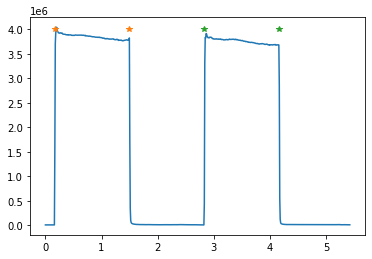

In [3]:
pump, image = pulseAnalayzer.getPulsesTimesteps(t, x)

plt.plot(t,x)
plt.plot(t[pump], [4e6,4e6], '*')
plt.plot(t[image], [4e6,4e6], '*')

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


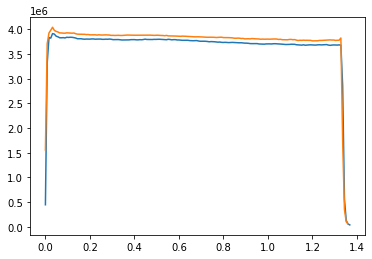

In [4]:
t_image, x_image = pulseAnalayzer.getOnlyImage(t, x)
t_pump, x_pump = pulseAnalayzer.getOnlyPump(t, x)

print(type(t_image), type(x_image))

plt.plot(t_image, x_image)
plt.plot(t_pump, x_pump)

In [5]:
p = pulseAnalayzer.getIntegraionOfPump(t,x)
print(p)
i = pulseAnalayzer.getIntegraionOfImageBegining(t,x)
print(i)

5073394.404
1478457.8200000012
